### **Ejercicio 3**

#### **Random walk**

Implemente un caminante al azar simétrico, en una red bidimensional.

1. Grafique $100$ trayectorias, hasta un tiempo $t_f = 1\;000$.

2. Usando un ensemble de al menos $100\;000$ caminantes, calcule la posición media y su desviación estándar en función del tiempo, hasta $t_{f} =10\;000$.

3. Calcule la distribución de la posición haciendo histogramas a distintos tiempos (eligiendo algunos tiempos característicos para ello), y compare el resultado con la distribución correspondiente a un proceso difusivo.

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# #Defino un caminante al azar
# def caminante_aleatorio(N):
#     '''
#     N: nro de pasos
#     '''
#     x = np.empty(N)
#     y = np.empty(N)
#     x[0] = 0
#     y[0] = 0
#     for i in range(1,N):
#         x[i] = x[i-1] + np.random.randint(-1,1+1)
#         y[i] = y[i-1] + np.random.randint(-1,1+1)
#     return x,y

def caminante_aleatorio(N):
    '''
    N: nro de pasos
    '''
    #Aloco memoria
    x = np.empty(N)
    y = np.empty(N)
    #Defino condiciones iniciales
    x[0] = 0
    y[0] = 0

    pasos_x = np.random.choice([-1, 0, 1], size=N-1)
    pasos_y = np.random.choice([-1, 0, 1], size=N-1)
    x[1:] = np.cumsum(pasos_x)
    y[1:] = np.cumsum(pasos_y)

    return x, y


#Defino un ensamble de caminantes
# def ensamble_caminantes(N,n):
#     '''
#     N:nro de pasos
#     n: nro de caminantes
#     '''
#     x = np.empty((n,N))
#     y = np.empty((n,N))

#     for i in range(n):
#         x[i],y[i] = caminante_aleatorio(N)
#     return x,y



def ensamble_caminantes(N, n):
    '''
    N: nro de pasos
    n_ nro de caminantes
    '''
    #Aloco memoria
    x = np.empty((n,N))
    y = np.empty((n,N))
    #Defino condiciones iniciales
    x[:,0] = 0
    y[:,0] = 0

    pasos_x = np.random.choice([-1, 0, 1], size=(n,N-1))
    pasos_y = np.random.choice([-1, 0, 1], size=(n,N-1))
    x[:,1:] = np.cumsum(pasos_x, axis = 1)
    y[:,1:] = np.cumsum(pasos_y, axis = 1)

    return x, y


In [3]:
#Ejecuto 100 caminantes
x,y = ensamble_caminantes(1000,100)

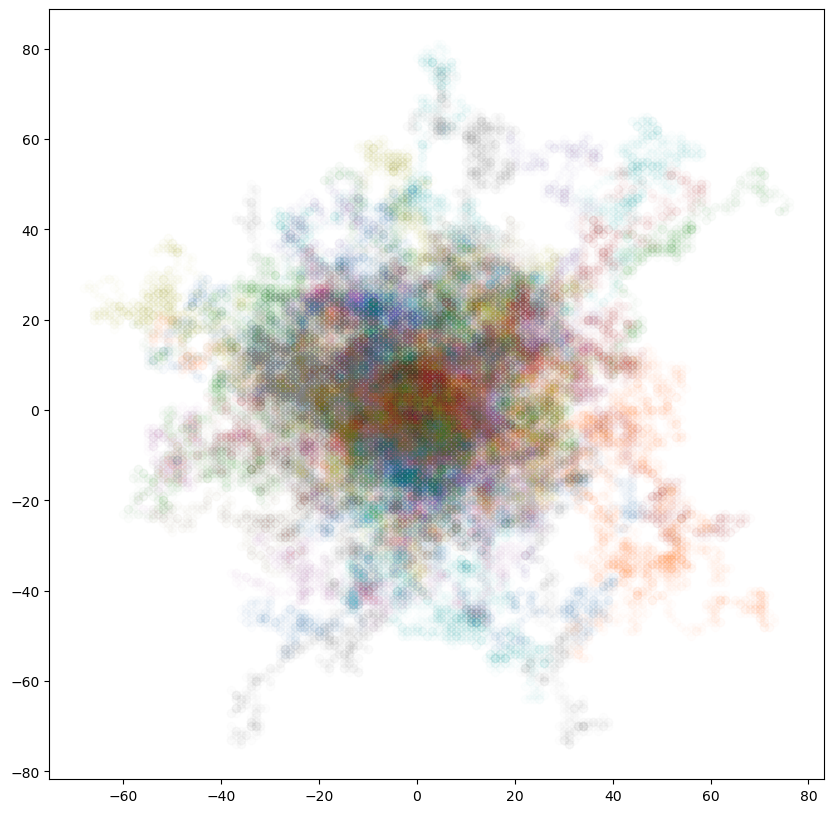

In [4]:
#Grafico
plt.figure(figsize=(10,10))
plt.plot(x.T,y.T, "-o", alpha = 0.01)

In [5]:
#Ahora con 100.000 caminantes
N = 10000
n = 10000
x,y = ensamble_caminantes(N,n) #usa 3.7 Gb de memoria



#Calculo la posición media de los caminantes en función del tiempo
x_mean = np.mean(x,axis=0)
y_mean = np.mean(y,axis=0)
#Calculo la desviación estándar
x_std = np.std(x,axis=0)
y_std = np.std(y,axis=0)
#Calculo la desviación estándar del promedio
x_std_mean = np.std(x_mean)
y_std_mean = np.std(y_mean)


para que corra lo anterior correctamente, a veces hay qye reiniciar el environment

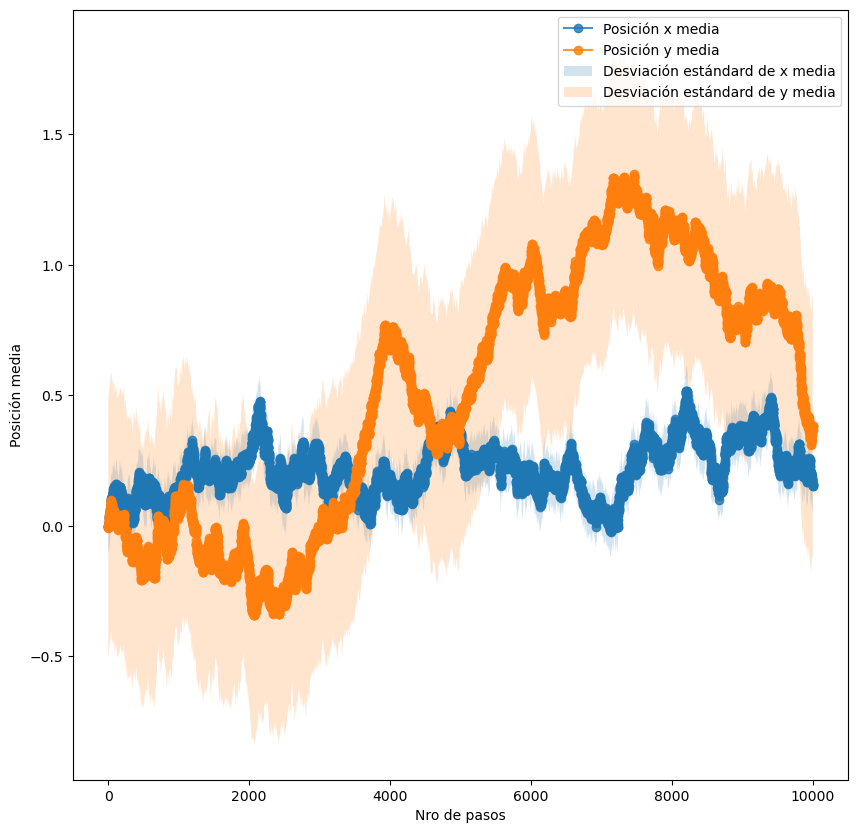

In [6]:
#Grafico la posición media en función del nro de pasos

plt.figure(figsize=(10,10))
plt.plot(np.arange(0,len(x_mean)),x_mean, "-o", alpha = 0.8, label = "Posición x media")
plt.plot(np.arange(0,len(x_mean)),y_mean, "-o", alpha = 0.8, label = "Posición y media")
#Agrego la desviación estándar como una banda
plt.fill_between(np.arange(0,len(x_mean)),x_mean-x_std_mean,x_mean+x_std_mean, alpha = 0.2, label = "Desviación estándard de x media")
plt.fill_between(np.arange(0,len(x_mean)),y_mean-y_std_mean,y_mean+y_std_mean, alpha = 0.2, label = "Desviación estándard de y media")
plt.legend()
plt.xlabel("Nro de pasos")
plt.ylabel("Posición media")
plt.show()

In [13]:
#Grafico un histograma de la posición x
t = 0

def plot_histograma(t):
    plt.figure(figsize=(10,10))
    plt.hist(x[:,t], bins = 100, density = True, label = "Posición x media", range = (np.min(x[:,-1]),np.max(x[:,-1])))
    plt.hist(y[:,t], bins = 100, density = True, label = "Posición y media", range = (np.min(y[:,-1]),np.max(y[:,-1])))
    plt.legend()
    plt.xlabel("Posición")
    plt.xlim(np.min(x[:,-1]),np.max(x[:,-1]))
    plt.ylim(0,0.04)
    plt.ylabel("Densidad de probabilidad")
    plt.show()


from ipywidgets import interact

interact(plot_histograma, t=(0, N-1))


interactive(children=(IntSlider(value=4999, description='t', max=9999), Output()), _dom_classes=('widget-inter…

<function __main__.plot_histograma(t)>